In [ ]:
pip install librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pydub

In [ ]:
pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=04c0298bb06e2997cb087afc45dd9fbef7c307765d276fb801ad3dd293c0b923
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import IPython.display as ipd
import music21
from pydub import AudioSegment
import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa import display as librosadisplay

import logging
import math
import statistics
import sys

from IPython.display import Audio, Javascript
from scipy.io import wavfile
import soundfile as sf

from base64 import b64decode

import music21
from pydub import AudioSegment

In [ ]:
INPUT_SOURCE = '/content/drive/MyDrive/TY-SEM-II/EDI/Audio-Samples/d3.wav'
print('You selected', INPUT_SOURCE)

if INPUT_SOURCE == 'RECORD':
  uploaded_file_name = record(5)
elif INPUT_SOURCE == 'UPLOAD':
  try:
    from google.colab import files
  except ImportError:
    print("ImportError: files from google.colab seems to not be available")
  else:
    uploaded = files.upload()
    for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[fn])))
    uploaded_file_name = next(iter(uploaded))
    print('Uploaded file: ' + uploaded_file_name)
elif INPUT_SOURCE.startswith('/content/drive/'):
  try:
    from google.colab import drive
  except ImportError:
    print("ImportError: files from google.colab seems to not be available")
  else:
    drive.mount('/content/drive')
    # don't forget to change the name of the file you
    # will you here!
    gdrive_audio_file = 'YOUR_MUSIC_FILE.wav'
    uploaded_file_name = INPUT_SOURCE
elif INPUT_SOURCE.startswith('http'):
  !wget --no-check-certificate 'https://storage.googleapis.com/download.tensorflow.org/data/c-scale-metronome.wav' -O c-scale.wav
  uploaded_file_name = 'c-scale.wav'
else:
  print('Unrecognized input format!')
  print('Please select "RECORD", "UPLOAD", or specify a file hosted on Google Drive or a file from the web to download file to download')

You selected /content/drive/MyDrive/TY-SEM-II/EDI/Audio-Samples/d3.wav
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the audio file
audio_file, sr = librosa.load('/content/drive/MyDrive/edi2023/piano.wav')

# Set the threshold for silence detection
threshold_energy = np.mean(np.abs(audio_file)) * 1.5  # Adjust the multiplier as needed

# Find the indices where the audio exceeds the threshold energy
non_silent_indices = np.where(np.abs(audio_file) > threshold_energy)[0]

# Detect the start and end indices of the music
start_index = non_silent_indices[0]
end_index = non_silent_indices[-1]

# Extract the music segment
music_segment = audio_file[start_index:end_index]

#save this new audio
output_path = '/content/drive/MyDrive/edi2023/piano-trim.wav'
sf.write(output_path, music_segment, sr)

# Play the music segment
from IPython.display import Audio
# Load the audio file
audio_file, sr = librosa.load('/content/drive/MyDrive/edi2023/piano-trim.wav')
# Play the audio
Audio(audio_file, rate=sr)
print(sr)

22050


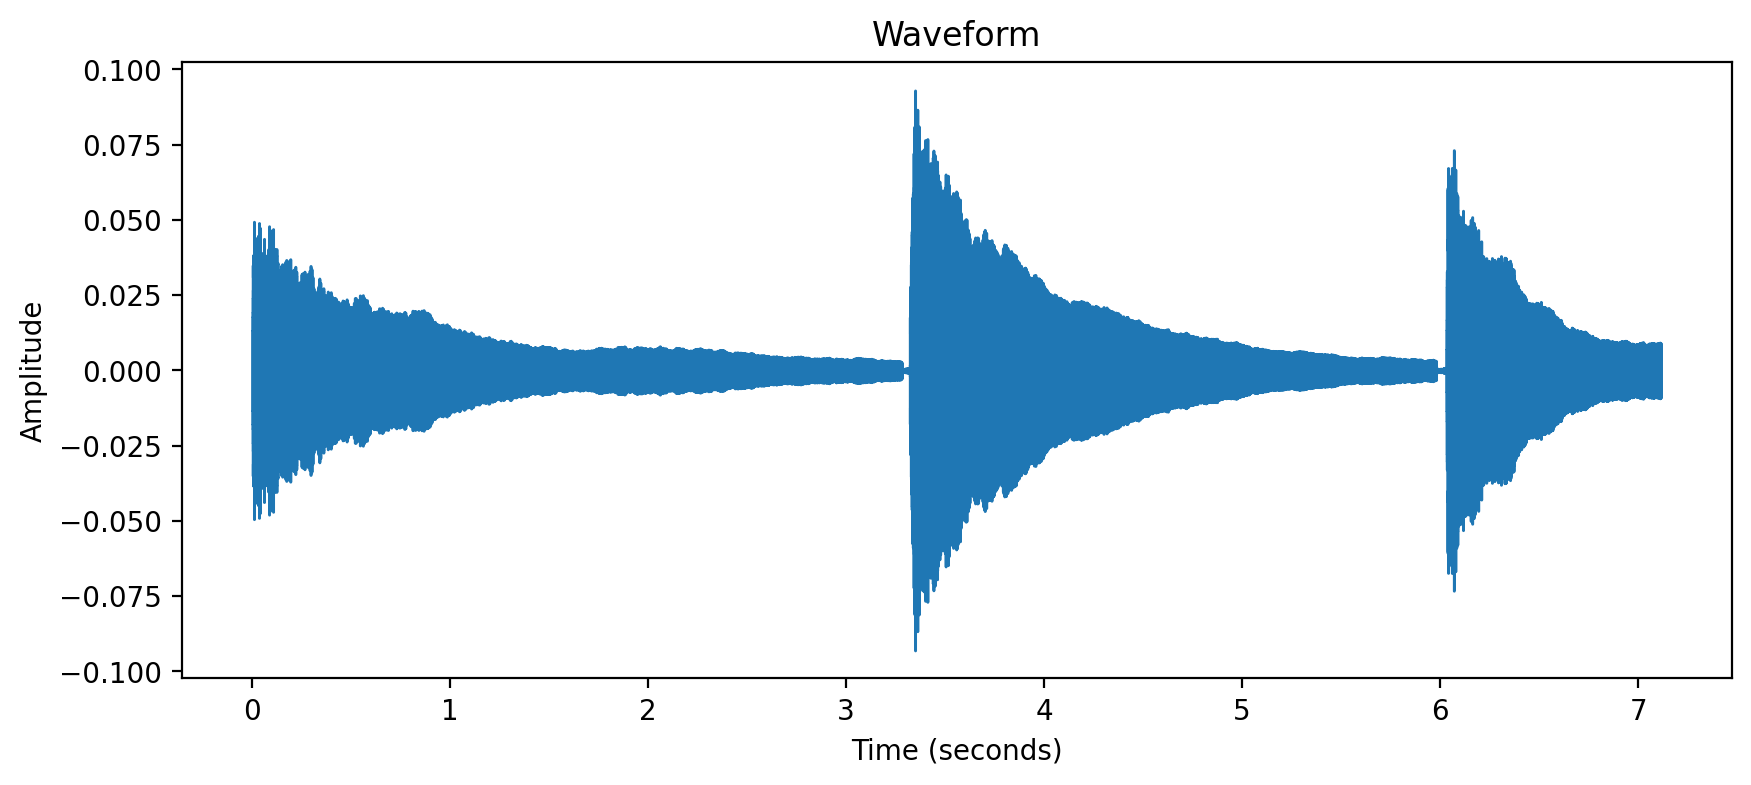

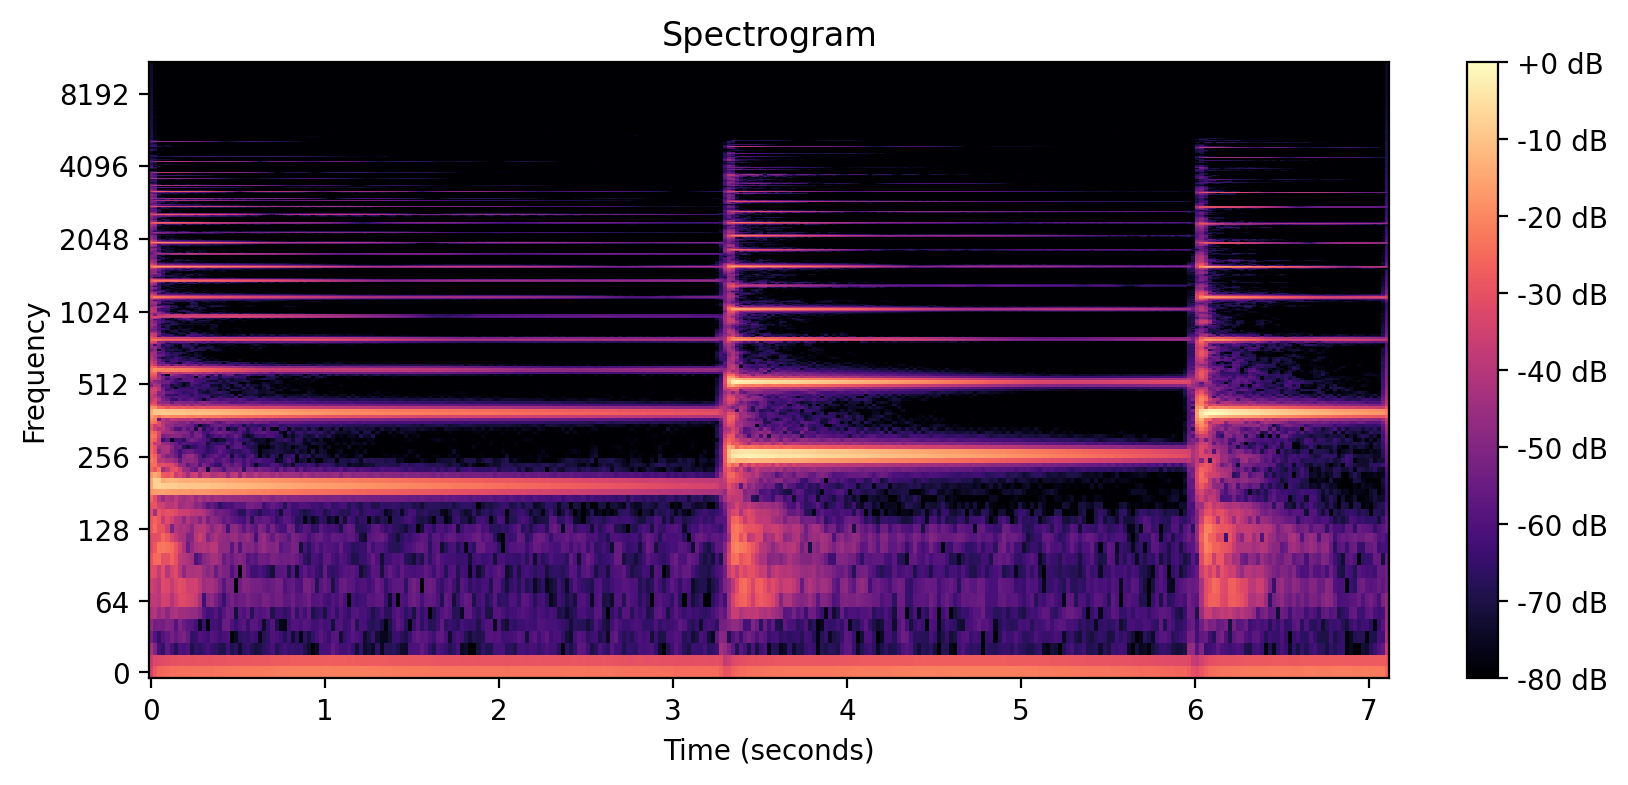

In [ ]:
# Calculate the duration of the audio file
# audio_file, sr = librosa.load('/content/drive/MyDrive/TY-SEM-II/EDI/Audio-Samples/trimmed-furelise.mp3')
duration = len(audio_file) / sr

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_file, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# Plot the spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_file)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
EXPECTED_SAMPLE_RATE = 22050

def convert_audio(user_file, output_file='converted_audio_file.wav'):
  audio = AudioSegment.from_file(user_file)
  audio = audio.set_frame_rate(EXPECTED_SAMPLE_RATE).set_channels(1)
  audio.export(output_file, format="wav")
  return output_file

In [ ]:
audio_file_loc = '/content/drive/MyDrive/TY-SEM-II/EDI/Final_Notebooks/Test/blankspacestart.wav'
converted_audio_file = convert_audio(audio_file_loc)

In [ ]:
# Loading audio samples from the wav file:
sample_rate, audio_samples = wavfile.read(converted_audio_file, 'rb')

# Show some basic information about the audio.
duration = len(audio_samples)/sample_rate
print(f'Sample rate: {sample_rate} Hz')
print(f'Total duration: {duration:.2f}s')
print(f'Size of the input: {len(audio_samples)}')

# Let's listen to the wav file.
Audio(audio_samples, rate=sample_rate)

Sample rate: 22050 Hz
Total duration: 7.74s
Size of the input: 170667


In [ ]:
# Base Code - 1
import librosa
import numpy as np

def process_frame(frame):
    pitch = librosa.yin(frame, fmin=80, fmax=900)
    # return np.mean(pitch[1:])  # Calculate the average pitch value
    return pitch
    # print(pitch)

def process_audio(audio, frame_size, hop_length):
    frames = librosa.util.frame(audio, frame_length=frame_size, hop_length=hop_length)
    num_frames = frames.shape[1]
    pitches = []

    for i in range(num_frames):
        frame = frames[:, i]
        pitch = process_frame(frame)
        for j in pitch:
          pitches.append(j)

    return pitches

audio, sr = librosa.load(converted_audio_file)

frame_size = 2048  # Increase frame length
hop_length = 1024 # Increase hop length

pitches = process_audio(audio, frame_size, hop_length)

# Print the estimated pitch for each frame

for i, pitch in enumerate(pitches):
    print(f"Frame {i+1}: {pitch} Hz")
#
# print(pitches)

Frame 1: 918.75 Hz
Frame 2: 918.75 Hz
Frame 3: 918.75 Hz
Frame 4: 918.75 Hz
Frame 5: 918.75 Hz
Frame 6: 918.75 Hz
Frame 7: 918.75 Hz
Frame 8: 918.75 Hz
Frame 9: 918.75 Hz
Frame 10: 918.75 Hz
Frame 11: 918.75 Hz
Frame 12: 918.75 Hz
Frame 13: 918.75 Hz
Frame 14: 802.0715330981756 Hz
Frame 15: 814.2499363207188 Hz
Frame 16: 918.75 Hz
Frame 17: 802.0716654161645 Hz
Frame 18: 399.74357706407267 Hz
Frame 19: 85.23424773989039 Hz
Frame 20: 332.2255318990734 Hz
Frame 21: 918.75 Hz
Frame 22: 520.7145941116389 Hz
Frame 23: 85.23175193649708 Hz
Frame 24: 469.11669922864303 Hz
Frame 25: 472.5386724057345 Hz
Frame 26: 918.75 Hz
Frame 27: 918.75 Hz
Frame 28: 471.3490947217904 Hz
Frame 29: 492.56956338735165 Hz
Frame 30: 121.94784946233014 Hz
Frame 31: 918.75 Hz
Frame 32: 492.56956632377165 Hz
Frame 33: 97.58726461162325 Hz
Frame 34: 479.1523894643147 Hz
Frame 35: 481.67278846756477 Hz
Frame 36: 91.13285289757984 Hz
Frame 37: 476.4222549560944 Hz
Frame 38: 481.2391916828792 Hz
Frame 39: 490.074618288

In [ ]:
def map_pitch_to_notes(pitch_values, window_size=2048, hop_length=1024, pitch_threshold=0.5, pitch_difference_threshold=0.1):
    num_windows = len(pitch_values)
    notes = []
    current_note = None

    # Iterate over each window
    for i in range(num_windows):
        pitch = pitch_values[i]

        # Check if pitch value exceeds the threshold
        if pitch > pitch_threshold:
            # If there is no current note, create a new note
            if current_note is None:
                current_note = {'start': i * hop_length, 'end': (i * hop_length) + window_size, 'pitches': [pitch]}
            else:
                # If the current pitch is within the difference threshold of the previous note's pitch, extend the note
                if abs(pitch - current_note['pitches'][-1]) <= pitch_difference_threshold:
                    current_note['end'] = (i * hop_length) + window_size
                    current_note['pitches'].append(pitch)
                else:
                    # Add the completed note to the notes list
                    notes.append(current_note)
                    # Create a new note
                    current_note = {'start': i * hop_length, 'end': (i * hop_length) + window_size, 'pitches': [pitch]}
        else:
            # If there is a current note, add it to the notes list and reset the current note
            if current_note is not None:
                notes.append(current_note)
                current_note = None

    # Add the last note if it was not completed
    if current_note is not None:
        notes.append(current_note)

    return notes


In [ ]:
# Example usage
# Replace pitch_values with the actual pitch values for your song

pitch_values = # Example random pitch values
notes = map_pitch_to_notes(pitch_values)

# Print the detected notes
for note in notes:
    print(f"Start Time: {note['start']} ms, End Time: {note['end']} ms, Pitches: {note['pitches']}")

Frame 1: 1002.2727272727273 Hz
Frame 2: 1002.2727272727273 Hz
Frame 3: 1002.2727272727273 Hz
Frame 4: 1002.2727272727273 Hz
Frame 5: 1002.2727272727273 Hz
Frame 6: 1002.2727272727273 Hz
Frame 7: 1002.2727272727273 Hz
Frame 8: 1002.2727272727273 Hz
Frame 9: 1002.2727272727273 Hz
Frame 10: 1002.2727272727273 Hz
Frame 11: 1002.2727272727273 Hz
Frame 12: 1002.2727272727273 Hz
Frame 13: 1002.2727272727273 Hz
Frame 14: 1002.2727272727273 Hz
Frame 15: 814.2499363207188 Hz
Frame 16: 802.0716654161645 Hz
Frame 17: 802.0716654161645 Hz
Frame 18: 399.74357706407267 Hz
Frame 19: 399.74357706407267 Hz
Frame 20: 399.74357706407267 Hz
Frame 21: 332.2255318990734 Hz
Frame 22: 469.11669922864303 Hz
Frame 23: 472.5386724057345 Hz
Frame 24: 472.5386724057345 Hz
Frame 25: 472.5386724057345 Hz
Frame 26: 472.5386724057345 Hz
Frame 27: 492.56956338735165 Hz
Frame 28: 492.56956338735165 Hz
Frame 29: 492.56956338735165 Hz
Frame 30: 492.56956338735165 Hz
Frame 31: 492.56956338735165 Hz
Frame 32: 479.15238946431

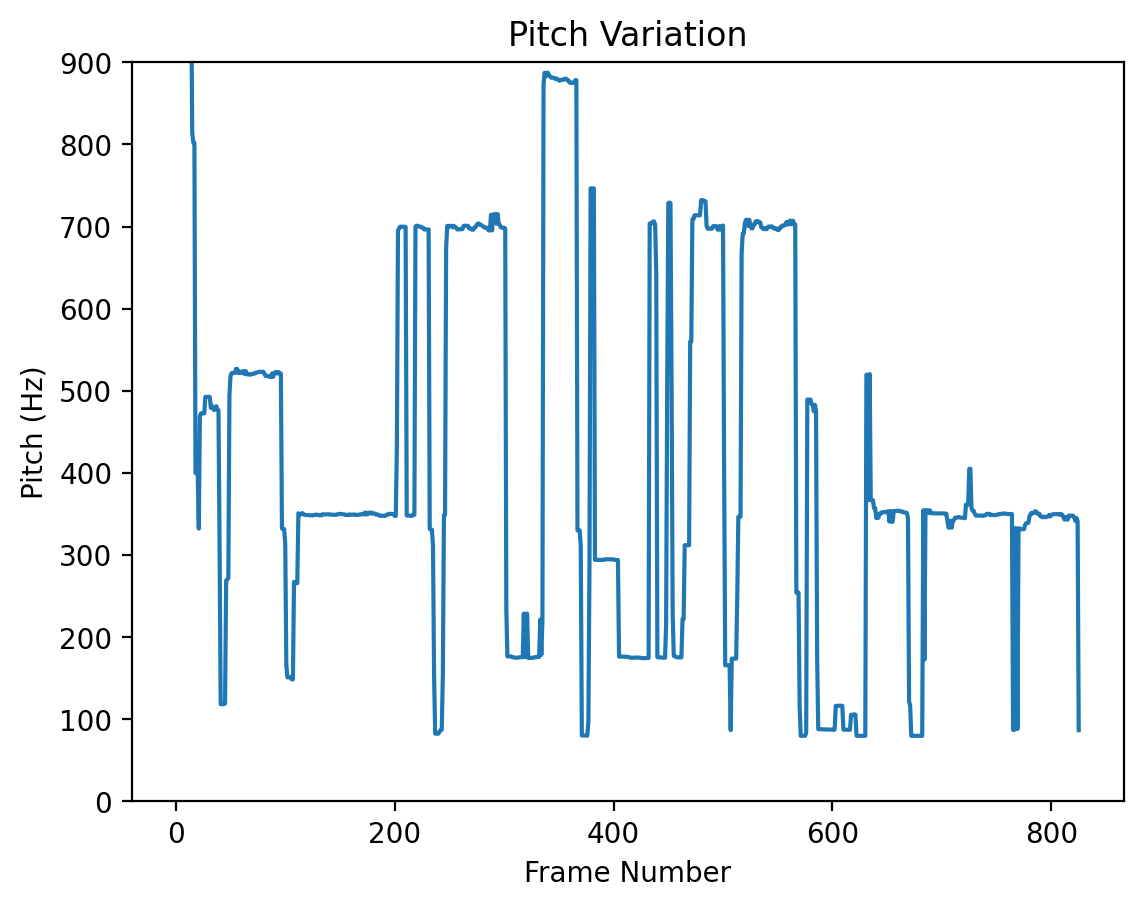

In [ ]:
# Median Filtering Applied to this Code.
import librosa
import numpy as np
from scipy.signal import medfilt

def process_frame(frame):
    pitch = librosa.yin(frame, fmin=80, fmax=1000)
    return pitch

def process_audio(audio, frame_size, hop_length, median_filter_size):
    frames = librosa.util.frame(audio, frame_length=frame_size, hop_length=hop_length)
    num_frames = frames.shape[1]
    pitches = []

    for i in range(num_frames):
        frame = frames[:, i]
        pitch = process_frame(frame)
        for j in pitch:
            pitches.append(j)

    pitches = np.array(pitches)
    filtered_pitches = medfilt(pitches, median_filter_size)

    return filtered_pitches

audio, sr = librosa.load(converted_audio_file)

frame_size = 2048  # Increase frame length
hop_length = 1024  # Increase hop length
median_filter_size = 5  # Adjust the size as needed

filtered_pitches = process_audio(audio, frame_size, hop_length, median_filter_size)

# Print the estimated pitch for each frame
for i, pitch in enumerate(filtered_pitches):
    print(f"Frame {i+1}: {pitch} Hz")

# Create x-axis values for the frame number
frame_numbers = np.arange(len(filtered_pitches)) + 1

# Plot the pitch values
plt.plot(frame_numbers, filtered_pitches)
plt.xlabel('Frame Number')
plt.ylabel('Pitch (Hz)')
plt.title('Pitch Variation')
plt.ylim(0, 900)
plt.show()

In [ ]:
# Define mapping between pitch values and note names
notes ={
    16.35: 'C0', 17.32: 'C#0/Db0', 18.35: 'D0', 19.45: 'D#0/Eb0', 20.60: 'E0', 21.83: 'F0', 23.12: 'F#0/Gb0',
    24.50: 'G0', 25.96: 'G#0/Ab0', 27.50: 'A0', 29.14: 'A#0/Bb0', 30.87: 'B0', 32.70: 'C1', 34.65: 'C#1/Db1',
    36.71: 'D1', 38.89: 'D#1/Eb1', 41.20: 'E1', 43.65: 'F1', 46.25: 'F#1/Gb1', 49.00: 'G1', 51.91: 'G#1/Ab1',
    55.00: 'A1', 58.27: 'A#1/Bb1', 61.74: 'B1', 65.41: 'C2', 69.30: 'C#2/Db2', 73.42: 'D2', 77.78: 'D#2/Eb2',
    82.41: 'E2', 87.31: 'F2', 92.50: 'F#2/Gb2', 98.00: 'G2', 103.83: 'G#2/Ab2', 110.00: 'A2', 116.54: 'A#2/Bb2',
    123.47: 'B2', 130.81: 'C3', 138.59: 'C#3/Db3', 146.83: 'D3', 155.56: 'D#3/Eb3', 164.81: 'E3', 174.61: 'F3',
    185.00: 'F#3/Gb3', 196.00: 'G3', 207.65: 'G#3/Ab3', 220.00: 'A3', 233.08: 'A#3/Bb3', 246.94: 'B3', 261.63: 'C4',
    277.18: 'C#4/Db4', 293.66: 'D4', 311.13: 'D#4/Eb4', 329.63: 'E4', 349.23: 'F4', 369.99: 'F#4/Gb4', 392.00: 'G4',
    415.30: 'G#4/Ab4', 440.00: 'A4', 466.16: 'A#4/Bb4', 493.88: 'B4', 523.25: 'C5', 554.37: 'C#5/Db5', 587.33: 'D5',
    622.25: 'D#5/Eb5', 659.25: 'E5', 698.46: 'F5', 739.99: 'F#5/Gb5', 783.99: 'G5', 830.61: 'G#5/'}

# Convert pitch values to notes
notes_detected = []

for p in filtered_pitches:
    # Find closest pitch value in the mapping
    closest_pitch = min(notes.keys(), key=lambda x:abs(x-p))
    # print(p)

    # Get note name from mapping
    note = notes[closest_pitch]

    # Append note name to list
    notes_detected.append(note)

# Print detected notes
print(notes_detected)

['G#5/', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G#5/', 'G5', 'G5', 'G4', 'G4', 'G4', 'E4', 'A#4/Bb4', 'A#4/Bb4', 'A#4/Bb4', 'A#4/Bb4', 'A#4/Bb4', 'B4', 'B4', 'B4', 'B4', 'B4', 'A#4/Bb4', 'B4', 'A#4/Bb4', 'A#4/Bb4', 'A#4/Bb4', 'B4', 'A#4/Bb4', 'A#4/Bb4', 'D#4/Eb4', 'A#2/Bb2', 'A#2/Bb2', 'A#2/Bb2', 'A#2/Bb2', 'A#2/Bb2', 'C4', 'C#4/Db4', 'C#4/Db4', 'B4', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'E4', 'E4', 'E4', 'D#4/Eb4', 'E3', 'D3', 'D3', 'D3', 'D3', 'D3', 'D3', 'C4', 'C4', 'C4', 'C4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4', 'F4',

In [ ]:
def remove_non_repeating_and_different_notes(notes):
    i = 0
    while i < len(notes) - 1:
        current_note = notes[i]
        next_note = notes[i + 1]

        if current_note != next_note:
            del notes[i]
        else:
            j = i + 1
            while j < len(notes) and notes[j] == current_note:
                j += 1

            i = j

    return notes


def remove_duplicates(notes):
    unique_notes = []
    for note in notes:
        if note not in unique_notes:
            unique_notes.append(note)
    return unique_notes


song_notes = notes_detected
filtered_notes = remove_non_repeating_and_different_notes(song_notes)
filtered_notes2 = remove_duplicates(filtered_notes)
print(filtered_notes2)

['G#5/', 'G5', 'G4', 'A#4/Bb4', 'B4', 'A#2/Bb2', 'C#4/Db4', 'C5', 'E4', 'D3', 'C4', 'F4', 'F5', 'E2', 'F2', 'F3', 'A#3/Bb3', 'F#5/Gb5', 'D4', 'A3', 'D#4/Eb4', 'C#5/Db5', 'E3', 'B3', 'D#2/Eb2', 'G#2/Ab2', 'F#4/Gb4', 'G#4/Ab4']


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


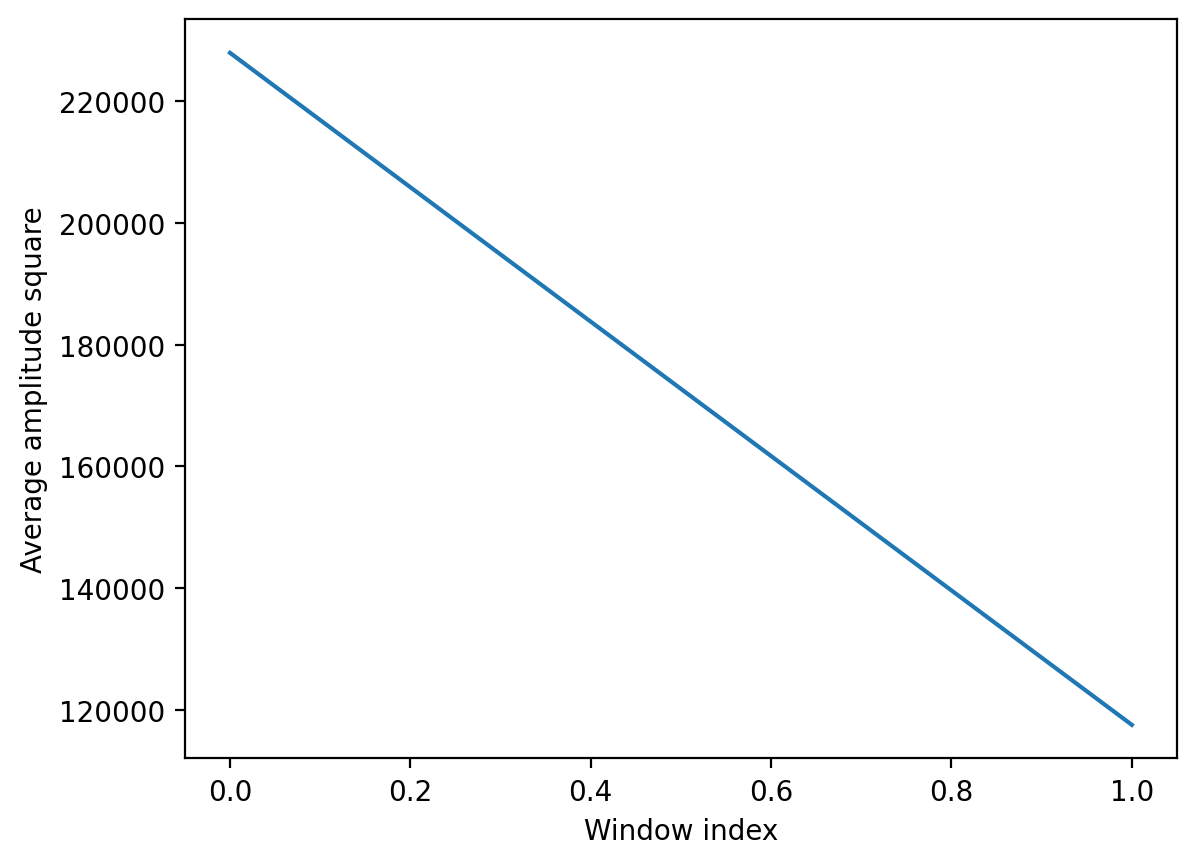

In [ ]:
# Average Amplitude Square - Visualisation.

# Step 1: Define the window size and step size
win_size = 2048
step_size = int(win_size / 3)  # 1/3 overlap

# Step 2: Use filtered_pitches as the input signal
audio_file = filtered_pitches

# Step 3: Calculate the number of windows
num_windows = (len(audio_file))//6

# Step 4: Create an empty list
avg_amplitudes = []

# Step 5: Calculate the average amplitude for each window
for i in range(num_windows):
    start = i * step_size
    end = start + win_size
    window = audio_file[start:end]
    avg_amplitude = np.mean(np.abs(window)**2)  # Square the average amplitude
    avg_amplitudes.append(avg_amplitude)

# Step 6: Plot the average amplitudes against the window index
plt.plot(avg_amplitudes)
plt.xlabel('Window index')
plt.ylabel('Average amplitude square')
plt.show()

In [ ]:
def levenshtein_distance(s1, s2):
    m = len(s1)
    n = len(s2)

    # Initialize matrix
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Initialize first row and column
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    # Fill in the rest of the matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,  # Deletion
                dp[i][j - 1] + 1,  # Insertion
                dp[i - 1][j - 1] + cost,  # Substitution
            )

    return dp[m][n]

In [ ]:
def find_best_match(song_database, small_sequence):
    best_match = None
    min_distance = float('inf')

    for song_sequence in song_database:
        distance = min(levenshtein_distance(song_sequence[i:i+len(small_sequence)], small_sequence) for i in range(len(song_sequence) - len(small_sequence) + 1))
        if distance < min_distance:
            min_distance = distance
            best_match = song_sequence

    return best_match

In [ ]:
song_database = [
    ['F#3/Gb3', 'D4', 'C3', 'A#2/Bb2', 'E3', 'F#5/Gb5', 'B3', 'F3', 'F#4/Gb4', 'B2', 'G#3/Ab3', 'A3', 'G#5/', 'F#2/Gb2', 'B4', 'C5', 'G#4/Ab4', 'D#5/Eb5', 'G4', 'F4', 'G3', 'G5', 'D#3/Eb3', 'C4', 'D3', 'C#4/Db4', 'C#3/Db3', 'A#3/Bb3', 'F2', 'E4', 'F5', 'E5', 'D5', 'A#4/Bb4', 'A4', 'G2', 'G#2/Ab2', 'A2', 'E2', 'C#5/Db5', 'D#4/Eb4'],
    ['G#5/', 'G5', 'G4', 'A#4/Bb4', 'B4', 'A#2/Bb2', 'C#4/Db4', 'C5', 'E4', 'D3', 'C4', 'F4', 'F5', 'E2', 'F2', 'F3', 'A#3/Bb3', 'F#5/Gb5', 'D4', 'A3', 'D#4/Eb4', 'C#5/Db5', 'E3', 'B3', 'D#2/Eb2', 'G#2/Ab2', 'F#4/Gb4', 'G#4/Ab4', 'C#3/Db3', 'A4', 'G3', 'E5', 'D#3/Eb3', 'G2', 'B2', 'F#2/Gb2', 'C3', 'A2', 'F#3/Gb3', 'D#5/Eb5', 'G#3/Ab3', 'D5'],
    ['G#5/', 'C#5/Db5', 'G4', 'B3', 'E2', 'F#5/Gb5', 'F#3/Gb3', 'D3', 'G3', 'D5', 'G2', 'G5', 'A4', 'D4', 'D#5/Eb5', 'E5', 'B2', 'A#3/Bb3', 'F2', 'B4', 'C3', 'C#3/Db3', 'C4', 'C#4/Db4', 'A#2/Bb2', 'A2', 'D#4/Eb4', 'G#3/Ab3', 'E4', 'F4', 'F#4/Gb4', 'G#4/Ab4', 'F#2/Gb2', 'A3', 'F3', 'E3', 'A#4/Bb4', 'G#2/Ab2', 'D#2/Eb2', 'D#3/Eb3'],
    ['G#5/', 'C#4/Db4', 'C#3/Db3', 'B2', 'F2', 'F3', 'G#3/Ab3', 'F#3/Gb3', 'G#2/Ab2', 'A3', 'A#3/Bb3', 'B3', 'C4', 'G3', 'G2', 'F#2/Gb2', 'E3', 'D#4/Eb4', 'E4', 'D3', 'D4', 'A#2/Bb2', 'E2', 'D#2/Eb2', 'A2', 'D#3/Eb3', 'F5', 'F4', 'C3', 'C#5/Db5', 'G5', 'F#4/Gb4', 'G#4/Ab4', 'G4'],
    ['G#5/', 'F2', 'D#2/Eb2', 'G3', 'E2', 'G2', 'G#2/Ab2', 'A#4/Bb4', 'G#4/Ab4', 'F#3/Gb3', 'A#2/Bb2', 'A2', 'B2', 'E3', 'F4', 'F5', 'B3', 'A#3/Bb3', 'C5', 'F#2/Gb2', 'C3', 'D3', 'C#3/Db3', 'F3', 'A3', 'C#5/Db5', 'C#4/Db4', 'G#3/Ab3', 'D5', 'A4', 'G4', 'B4', 'D4', 'F#4/Gb4', 'E4', 'D#3/Eb3', 'D#4/Eb4', 'C4', 'E5', 'D#5/Eb5', 'G5', 'F#5/Gb5'],
    ['C#3/Db3', 'C3', 'F#3/Gb3', 'F#2/Gb2', 'A3', 'D#4/Eb4', 'A2', 'B2', 'E5', 'F#5/Gb5', 'G2', 'G#3/Ab3', 'C5', 'F2', 'G3', 'C4', 'D4', 'D3', 'E2', 'E3', 'F3', 'G#2/Ab2', 'A#2/Bb2', 'B3', 'D#5/Eb5', 'D#3/Eb3', 'D5', 'C#4/Db4', 'A#3/Bb3', 'E4', 'C#5/Db5', 'F#4/Gb4', 'F4', 'G4', 'B4'],
    ['G#5/', 'F#3/Gb3', 'D#4/Eb4', 'D#5/Eb5', 'G#3/Ab3', 'D#3/Eb3', 'G#2/Ab2', 'A3', 'A4', 'G#4/Ab4', 'D4', 'C4', 'C5', 'A#3/Bb3', 'B3', 'A2', 'A#2/Bb2', 'C3', 'G3', 'D3', 'C#3/Db3', 'C#4/Db4', 'B2', 'F2', 'C#5/Db5', 'A#4/Bb4', 'E3', 'F#4/Gb4', 'D5', 'F#2/Gb2', 'D#2/Eb2', 'G2', 'E2', 'G4', 'E4', 'F4', 'B4', 'E5', 'F3']
]

small_sequence = ['G#5/', 'G5', 'G4', 'A#4/Bb4', 'B4', 'A#2/Bb2', 'C#4/Db4', 'C5', 'E4', 'D3', 'C4', 'F4', 'F5', 'E2', 'F2', 'F3', 'A#3/Bb3', 'F#5/Gb5', 'D4', 'A3', 'D#4/Eb4', 'C#5/Db5', 'E3', 'B3', 'D#2/Eb2', 'G#2/Ab2', 'F#4/Gb4', 'G#4/Ab4']


best_match = find_best_match(song_database, small_sequence)

song_mapping = {
      tuple(['F#3/Gb3', 'D4', 'C3', 'A#2/Bb2', 'E3', 'F#5/Gb5', 'B3', 'F3', 'F#4/Gb4', 'B2', 'G#3/Ab3', 'A3', 'G#5/', 'F#2/Gb2', 'B4', 'C5', 'G#4/Ab4', 'D#5/Eb5', 'G4', 'F4', 'G3', 'G5', 'D#3/Eb3', 'C4', 'D3', 'C#4/Db4', 'C#3/Db3', 'A#3/Bb3', 'F2', 'E4', 'F5', 'E5', 'D5', 'A#4/Bb4', 'A4', 'G2', 'G#2/Ab2', 'A2', 'E2', 'C#5/Db5', 'D#4/Eb4']) : 'Ajib Dastan Hai Ye',
      tuple(['G#5/', 'G5', 'G4', 'A#4/Bb4', 'B4', 'A#2/Bb2', 'C#4/Db4', 'C5', 'E4', 'D3', 'C4', 'F4', 'F5', 'E2', 'F2', 'F3', 'A#3/Bb3', 'F#5/Gb5', 'D4', 'A3', 'D#4/Eb4', 'C#5/Db5', 'E3', 'B3', 'D#2/Eb2', 'G#2/Ab2', 'F#4/Gb4', 'G#4/Ab4', 'C#3/Db3', 'A4', 'G3', 'E5', 'D#3/Eb3', 'G2', 'B2', 'F#2/Gb2', 'C3', 'A2', 'F#3/Gb3', 'D#5/Eb5', 'G#3/Ab3', 'D5']) : 'Blank Space',
      tuple(['G#5/', 'C#5/Db5', 'G4', 'B3', 'E2', 'F#5/Gb5', 'F#3/Gb3', 'D3', 'G3', 'D5', 'G2', 'G5', 'A4', 'D4', 'D#5/Eb5', 'E5', 'B2', 'A#3/Bb3', 'F2', 'B4', 'C3', 'C#3/Db3', 'C4', 'C#4/Db4', 'A#2/Bb2', 'A2', 'D#4/Eb4', 'G#3/Ab3', 'E4', 'F4', 'F#4/Gb4', 'G#4/Ab4', 'F#2/Gb2', 'A3', 'F3', 'E3', 'A#4/Bb4', 'G#2/Ab2', 'D#2/Eb2', 'D#3/Eb3']) : 'Every thing I need',
      tuple(['G#5/', 'C#4/Db4', 'C#3/Db3', 'B2', 'F2', 'F3', 'G#3/Ab3', 'F#3/Gb3', 'G#2/Ab2', 'A3', 'A#3/Bb3', 'B3', 'C4', 'G3', 'G2', 'F#2/Gb2', 'E3', 'D#4/Eb4', 'E4', 'D3', 'D4', 'A#2/Bb2', 'E2', 'D#2/Eb2', 'A2', 'D#3/Eb3', 'F5', 'F4', 'C3', 'C#5/Db5', 'G5', 'F#4/Gb4', 'G#4/Ab4', 'G4']) : 'Perfect',
      tuple(['G#5/', 'F2', 'D#2/Eb2', 'G3', 'E2', 'G2', 'G#2/Ab2', 'A#4/Bb4', 'G#4/Ab4', 'F#3/Gb3', 'A#2/Bb2', 'A2', 'B2', 'E3', 'F4', 'F5', 'B3', 'A#3/Bb3', 'C5', 'F#2/Gb2', 'C3', 'D3', 'C#3/Db3', 'F3', 'A3', 'C#5/Db5', 'C#4/Db4', 'G#3/Ab3', 'D5', 'A4', 'G4', 'B4', 'D4', 'F#4/Gb4', 'E4', 'D#3/Eb3', 'D#4/Eb4', 'C4', 'E5', 'D#5/Eb5', 'G5', 'F#5/Gb5']) : 'Shake It Off',
      tuple(['C#3/Db3', 'C3', 'F#3/Gb3', 'F#2/Gb2', 'A3', 'D#4/Eb4', 'A2', 'B2', 'E5', 'F#5/Gb5', 'G2', 'G#3/Ab3', 'C5', 'F2', 'G3', 'C4', 'D4', 'D3', 'E2', 'E3', 'F3', 'G#2/Ab2', 'A#2/Bb2', 'B3', 'D#5/Eb5', 'D#3/Eb3', 'D5', 'C#4/Db4', 'A#3/Bb3', 'E4', 'C#5/Db5', 'F#4/Gb4', 'F4', 'G4', 'B4']) : 'Shape Of You',
      tuple(['G#5/', 'F#3/Gb3', 'D#4/Eb4', 'D#5/Eb5', 'G#3/Ab3', 'D#3/Eb3', 'G#2/Ab2', 'A3', 'A4', 'G#4/Ab4', 'D4', 'C4', 'C5', 'A#3/Bb3', 'B3', 'A2', 'A#2/Bb2', 'C3', 'G3', 'D3', 'C#3/Db3', 'C#4/Db4', 'B2', 'F2', 'C#5/Db5', 'A#4/Bb4', 'E3', 'F#4/Gb4', 'D5', 'F#2/Gb2', 'D#2/Eb2', 'G2', 'E2', 'G4', 'E4', 'F4', 'B4', 'E5', 'F3']) : 'Night Changes',
}

if best_match:
    print("The best match is:", song_mapping[tuple(best_match)])
else:
    print("No match found.")


The best match is: Blank Space


# ![a.png](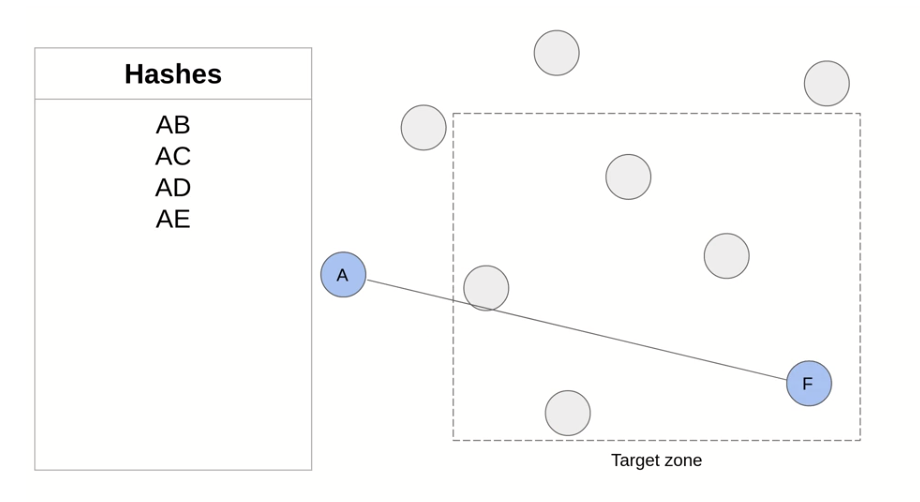/5j4S1jaiz/as2ILSjIo6L/+N6k6hCo8k0KoWocKIfLyrSqMojQKJfIqrYCHGoHmO0YlQUUV2vD6iIIuzikjWoeqM6jhM2OAGD97m6puFE1DSwmSubuZ7AZq51S/vyGH9uGHDnbA9y2MyVzVwbO/ybkrFjjbz1xXfaFw+BpLr9/0zNXLHvIZDi8RX7k/0R6zH6d2c8J0JY1QqKtQxYywCqPngcmsFa68B9FQMVlsFU3XrB2m5rvfhZcR7WXfW2BfOtbcAlGSzWcwIeY72fWIe1HO7HNiOwgPUardsWLIf7rPcUTRlx2QnrUilYNyZUcFH9RICtOiKppaGbuVqf0en2r7ps5gp4H/F+4j2u7vmxbWgOi/vwOeOn9dnjJ1j34bVgXdZtsD5TLIv5eJ3WPlXx/ur20YrzrdvW463nsm5bKs7HhCatGIAHlVCrSThCPPobo7KKEzVo7l1X2MyVyHaxMklUTxAi7Sp8+RM1Fdjlsd9XPPitCTwGQakmQRJwII6DezwOPyseLFusZTDhOayDZ/yOefgdy1j3VYT1nW69YG03Hm+97orzqrttwXzreSuyntPaXtzGduE2HmM9DrctVW9b8FjrPUVIQR9L9BdFX1NUxFJTU7UShgFgUBW15UtA4D3A68Hrbwh4j/Fenu75Md/6zKxl8BO3Mb/ifdZnbN3GZH2G1r6M29Z6AI/B8tXtoxXnW7fxEzC/4m1Lxfl4HvS3RYUU/TTRrBuD7qD/MZqHo5KNvslE1DQxTBIRETVxCAwYvAUDseByKbh2JSpQGIQIVSc0x0SIoaYJzWqxX+Aaq6hU43ImGPgnODhYm7pixGEiapoYJomIiEgrj+iHhz5xaA6KwX527dql/fUYFpo27BsYDRmjGmPCYFaoZGNgIAwORURNF8MkERERKYRGXKcTlciePXvqJUhQkazYpJKaHnz+aPYaGBio/WNRncRotBh4p2rTWiJqWvgvABEREZ2A4IA+eVX70RFh38B+UbXPJhE1XQyTREREREREVGMMk0RERERERFRjDJNERERERERUY006TAaGR0jviVfJ4GturTS17tHfXKLxCO89UAZeedMpr8XN28dcgoiIiIiIqPY06TDpHRQs7QYMl66jL6o0tYjoaC7ReLRs11k6jxh/ymtxdrfdi0wTEREREVHj1aTDpJ29gzi6uIqTq1ulyd6x8V2YGdtc9XVgataMLZmJiIiIiKj2MWkQERERERFRjTFMEhERERERUY0xTBIREREREVGNMUwSERERERFRjTFMEhERERERUY0xTBIREREREVGNMUwSERERERFRjTFMEhERERERUY0xTJ4jd5/m0rbvkEpT6579xS841Fyi8Qhq1/mU1xLatbe4efuYSxAREREREZVjmDxHfiFhMvCqmypNfS+ZLK2MENbYdBwy5pTX0nP85eIdFGIuQbaitKRYctJTJCX2cKUpPeGoFOblmkudVFxUYNwXV+3y1SktKTllWUwZifHmEpXlZ2dJytFTl8e2lJWVmUudlJF47JRldfn8PHOJk0pLSyQrOfGUZTOS4qWoIN9c6qQi4zkzEo+esnx2WoqUlZaaSxERERHRuWpmHOideqRXy5o1ayZ3fzxX7OwdzDlkwUF70qGDMvuFR8055RydXeTKJ6dJ89A25hxqikqKimTrwlmyYc5X5pxy9g6O4ubjJ27evuaccsWFBZKdelwKcrLNOeWwP3kHBYu9o5M5pxyWT4k9ZN46CX+rAeHtzFsnIbylxh02b53k5uUrHv4Bxt965fNTCI0FOVmnBEq/VuG6TVWlHYs1AmiOeaucnb29eAW0FGd3D3NOuSIjeOK1Vg3PLu6e4u7bXByqrL9Nr4HSbewl4uTqZs6h+nB42wbJ3LlG3vrie3NO9Q7u3S3PPHy37N6925xDjUmfPn3k0eenSZcevcw5tmXZwvny28+z5ccffzTnUGPi6ekpP6/fIZ5e3uac6l1zwTDpd8N99X7shO/pIaG+Mm3aNHMOUdPByiRRI1RSXKTVusSofZUmBMOqQRIQApNjoqtdvjqofFZdFlN1QRJyM9MkKfrAKcvnZ2dWW5nEeqoui6lqkASccEFVteqyqUePVFuFzTfCa0o16888nsDKJBEREVEtYpgksnXNmpVPREREREQ2hGGSyJYZGRLNQR1dXM0ZRERERES2gWGSyIbZ2dmLb3ArCWgdof0kNV0SEREREdkADsDTwDgAD/2RvKwMObp/pxzbu1PyMtOlzPiPaq5Vl17ScfAYcXQ5deAfqjtnOwBP9IF98so/HpHVq38TR0ecOKHGoqioSMZecIHc98/npEPXbuZc2/Lb0l/k919+kq+++kocHHgs0pgUFhZKREQ7mb54lXh4eplzq8cBeIjqH8NkA2OYpD+CP1GMXIpQWVxQgDnld1CNOGOUVx8/aWbHBhn16WzD5OGog/LG/z0hM2d8L4GBgeZcagySkpLkhqlT5a6/PyXtOnU259qW31cukzWL5srbb74pfn5+5lxqDI4dOyZjLxgnH81eIO4enubc6jFMEtU/hskGxjBJROezsw2TR2OOyGf/fUleePYZ6dSpkzmXGoM9e/bIsy+8KFP+8qCEtY0w59qWbRvXyYalC+Wxvz0ibdrwe7Ux2bp1q/zt8X/Kc+98KK5u7ubc6jFMEtU/nqInIqIG5+TsLM2DWvI6k43Qnj17xS8gSJxtuAk5KlrORhCJjIw051BjsWXLVglr207HECAi28MwSUREDc7VzU1atWkny1esMOdQY7Fy1Spp2Tpc3Dw8zDm2x9vXT9y8fWXDxo3mHGosFi5aKN369BN79nUlskkMk0RE1OAQJjt07S5JySmSmppqziVbl5KSIinpaRLRsYu4/UETxIbk49dcQsLbyvHjKZKRkWHOJVuH/rgp6RlGmOwr9vasTBLZIoZJIiJqcPb2DhLUMkTCIjrKzJmzzLlk62bNni2t2rSXoOAQm64cOTk5SavWbcTZ01sWL15iziVb9+lnn0mfwcPEr3mAjr9BRLaHYbKB4R9HF3cPadt3cKUpvNdAcXK13bO8RES1zcPTU3oNGirrN2+Ro0ePmnPJVsXFxcnmrdule9+B4untbc61XQEtWkjrDp1ky7btkpiYaM4lW3X48GHZsHmrjBx3EZu4EtkwhskG1syumbj7+UvfS6+rNPW+6Gpx9bL9L2ciojNxcHISdy8f89aZOTg6SlvjYL9bv0Hyxhtv6PULyTYVFBTIO++8I5169ZO2HTuJo6OTeY/tcnV1k07de4l3ULB88cUX3L9sWH5+vjz33PMy7vKrJaR1+FlXJb18/cSOzWGJ6hXDZINrppcBCWjdrtLkH9bWOAhzNpchImqc7PQgsJkU6jVS/xj6TvYZPFxKnN3ly6+/5gG/DUKQ/Pqb6VLs6KaVZDd32x14pyrf5v7Ste8ASckpkJ/mzZPi4mLzHrIVubm58t7774tHYIgMGDZS7M7y2sAFRgDFdYTZHJaofjFMEhFRnSosLJCszLMf9ARNJi+bfKPEJmfIy6+8wiavNgSfxeuvvy5xyely0dXX6SipjU1waGsZceElsuNAtLz33nts8mojcNnzQ4cOyfMvvCBZJfYy5fa/1KjKmJ6Wap4cYJgkqk8Mk0REVGfsHZ3Ezpgy09PNOX8MlQWElOHjJkpqXrF8P3O2fPf9DElLSzOXoPqGEXa/nzFDP4sU4zMZanw2GCG1MVaBUOlqERIqfYaOkriUDPluxkyZN28+R3ltIAiRCUag/+LLr2Tmj3Ml385ZJlxxdY2vW5qakixObh5s5kpUz5oZf8Rl5u91Bl82d3881/gDZwdqIqKmJCX2kKTv2STXXnON9B4wyJx79tA8ds2yxXIk8oCEh7QUNxcn6dSpk7Rt00bc3d3Fy8tLHDg4R61C0+KsrCxtbhgVFS379u+X3Px8iYlPktC27WTwqLHi4upmLt24ZaSlyvpVy+X4sTgJbREgXp4e0rFDBwkLCxMPDw+duH/VHhxyFhYW6v6VnZ0tByMj5cDBg5JfUCRH4hOlfdfuMmzMeHPpmlmzbInMmD1H2o68SNx9/c259WPrwlkyJNRXpk2bZs4hajoYJomIqM5kpx6XpN2bpHe7cLlm6q3m3JopKSmRw1EHZf+uHXL0yCFxNwKlv6+35Bthx93NXfLycs0lqTagIpSXly+uxnt7PDVNcgoKJTgsXDp17ynhRpg830bWLMjPk0ORB+XA7p2SFH9UPF2dxccIlTiR4Wq8F/nG/VQ7cDzo5ORshMd8Yz9zk8SUVCkoLpXWEe10cKTQ8DbmkjX34ZvTJDotV0J7DxHneu7HyzBJTRnDJBER1ZniwgKJ3bFR7JOOyFOvvHFOVZ6y0lI5npQgh40D//TUFDmemGgEzWLJZPPEWuWp1V5HCQgK0qasrSPaG7+3OOuBUBqr4qIiSYw/JrGHoiUt9bikJidrlTY7K8tcgs4V9iFcAgjX/cQ+5dM8QMKNINk8INBc4s8pKiyUh267QVoOniCBEZ3q/YQHwyQ1ZQyTRERUp5Ki90v6rvXy0N8ek5CwcHMuEVHtiD6wX15+4VnpNPFa8fQPMufWH4ZJaso4AE8tKCkqkuNHImXbotmyf+2vkpOWYt5Tu+L2bJPdyxdIaWmJ3j64fqVEb/ldSoo5dD4R2S6P5oHiEtRKVixeZM4hIqo9C+bMlMBOvcTFw9OcQ0T1hWGyFuRlZcjBdStl7fefyOZ538uxA7vMe2pX1Oa1sumnb6WspFRv7/ttiUQagRJhlhqvkqJCST16RKKNz3fPykWya9nPsn/tMjm2f5fuWw0NTQuTY6J1IvozXDy9xNE3SLZt3yaHoyLNuURE5+7A3t2ybccO8Q5tKw7OruZcIqovDJO1IDstWRKj9pePHtasmRzbt1NKS8qrh3Wp3YAREt57kNg7OJpzqLEpKsiX2N1btaq9a/kCidy4WqI2rZG9q34x5s2SA0aozDyeYC7dMEpLimX/ml9l/+pfzTlENWNnZy++LVuJW3AbWbn0Fx3RkYjoXOFYa+HcORLSc6BxDNY4L1VD1NgxTJ4jDC6RHh+rFaTWPfqJX0hrSYk7LFnJlS+CXJCTJZEbfpOEyL3mnHIIE5h/1AigFlSCUo/GSJQRLPYYoQIVq4zEY8Yd5gImZw9PcXZz1wBrycvMkNhdW2TfmqXG9Ksc3r5BcjPSdJ1ke1Dt271ioQbGsG59pOe4y6X3RVdLx6EXiJOrmzZlPrTldymqZjRBHJDXx0F5qbHvYJ/GdCalerHouoXXi2bef/Z119d7Rqdy8fQW3zadJDo+Sdas4IkJIjp3SxfMk/isPAns2EMcnWt2XUoiqh32TxvM3+vMM888I/0umyLNzsOR4LJSjkvk+lVGKMyTHuMuEwcHJ4nbt0M8fP0lILyduZRoWFjz/UdSYhxwh3btbc4VyTdC6Kqv/qdhM7zXQD1QToo+KNsX/yiHt62XtGMxkmaE1ZS4IzrEPoIhAgcuyrvyi/9p6GxjPM7e0VErpHtXLZYD65ZLypFo4zGHtEqal5WuHdKdXd151s7GRG5YqScSOg4dI91GXyS+wWHiHdhSAlpHiIdfgAa4vMx08Q+LEAdHJ0k6dEDSE45q09i43VslMWqfZCbFS3FhoQ6FXnGQq2JjGSwbf3C3JGIAFOP36pZDn9tU43niD+4x9r0DkmXsZ0biElfj4B/Ps2flLxK3d7sU5uXqCHkuHl5G0HXXJrn48sa+i/sLcrJPXNsrOSZKty0xep9kGNuH9bi4e+p+a8EJDlyDENuXfCRKco3Xiec9Zvz9iDTTEyUFuTnG69ymI3YWZGfpstgOZ/fyfTk98ag+T0LUfg3mOcbfAJ7D0dXVuN9OQzhaDaQlxOqJlri92yTp8EFdDv8eYVn9OzmwS7cBrwEh3sHJuXwjqVY5OLlIYanIjt9Xib+fj7QMaWXeQ0RUM2tXLpcfZs2SVv1GiJu3X4Me36BQEOrtKuPH/7lrZBI1ZgyT5wAVDhwMH/h9ufiFhkuXkRdqGIzduVmbXrTu0f/EwTMql9Fb1opXQMtKYRIHuwfXrdDmGeG9Bki+ccC8btYXkmQcILcfOFIi+g0zHtNCju3fqUECw2r3HH+Frnff6qVGiHSStn2HiJ1xkL9nxSJjWiAt23eRdgOGS4uITsYBe4n258RBP6qmPEi2LbG7Nus+FNS2oxEY21YazhyBCKHN1dNLfFqEaOjDZ7z/92Va+UZzWDw20QiACET4bD39A419w0H3qwQjHKKyjWa0KUbQwv5z3AhM+Dv0DgrWfQiV9aNGENz168+6j6XEHDKWOWiEyyPi7tNcg+fWBT8YgfCYEU4L9GQIgq2bj6/Mfv5R435P4/E7NBA7Gcv6h7bRkLtjyTyJNwLacfN5kw9HiaOLiwZkK8giNKJ/6NE92zU0Jx+J1MCLeR5+/uJnBOvslCTZMOcryU1LldSjh43XskVPivgY24/wuHflYn0P8fvxw5H6hZ6XnanPg/cNJ192/TpfDqxdrtV93SZjuWMHdktOarJxf6ocMf5eEUjjjO1IiNqrYdKvVWueeKkD2Pec3Tyk1M5BDuzcpteLDG4Vat5LRHR2Vi9fKguXLJXAbv3Fu0WrE8daDYVhkpoyNnM9BzhgTz12RIqMA/LgDt30YB6VmeZhbbSiiKpJTZSWlBrri9FKTET/YdLnkmukdc/+0nHIaBkwaeoZm6oW5uVoRdI3JEybSSJgtukzWPpdOkVDCppKokJJtsU7MEQrjke2bdB+iQh2acdiJT8nSxydXKRN70HSZdREPaFgQTU6LT5O2g8aKX0uvkYijM8aFe6dv86TZCNclpWVaihD89ms4wkS0W+o9LrwSj05gUC6bdEcDVTYn1A13PbLHK1q4/5eE6+UVl16S6wRrLYumKnBb9DVtxjhLUR8AoNlyLW3adCyxBhBDBXQTkPH6kkSVPw2/PiN5Kan6v7Xe+JV0q7/CK2qY+h0BDo8b056ivG8P+rIx9hXu4+9RALbdNBQmm2EvKqOGkG3sCBfT66EdO6hTW+xv8dH7pGgiE76+npOuEJDcsyOTcYX+x7zkeWyjFCKg40eF1ymy3oaYRWDHOFEDoJr9zGXGNs5TLcbIyQX5vEi5XXFwdlFAtp2FKfgtjJ7zhxZuWSRZGbw3yYi+mNpqSnyy09zZPbcn8S/a3/xC404cYKSiBoGw+Q5wAE4mgai6ufm7asHykV5ueLl30JyM9P0Uh41gWomDvJFyvTAHoNWlGsmQW07aHXqdLKSk7R6E9q1j575F7OqgspSi/Zd9QAdTfjYX8y2hHTuLh2GjNHPHs1GN879VrYs+EF2L1sgUZtWayURzTorcjE+XzSJ7jHucg1iXY0g1Gn4eK1+I0gVFxTopWoQFLuOuUi6jblYT0p0Hj5Om2LjJEj0pjValcTZ1HQjmKLajco6quldjfCKYFVUmK8jBXsFttQTJWiiiLBWsV9KfnamDJw01Vh+uFYLj+zYqFXTnheeXF83Yxu6X3Cp8fcRr01O8bxxe3YYt48a2z1OJ4RmhLwW7Tobz+Nkrv0kBG48R0cjtPq0aKXNYb2NcNvFeN2djQn9ldsa4TW0W1+tfqFJa0XY7vaDRulJmjZ9BhnL9dGm4Tj50n3spXobLQMCwttLYW6ONt2lumPn4CjewWHiEtpBZsyeI78smCc7tmyUPOO9JyKqKic7Szb9vkYWzf9JvjP+zWjRc7C4+Qeddy3eiBoj/hX+SaiuZB1P1INj9GmL3LBKKy9ooocDeVSW4g/s1gF2zhYqSmjmin8c3f3K+55ZkA31QrynaXqHg3o8HqG2WZXmHm5ePvoToQTNXsl2oDkm+koOuuZWrUD6h7XRMIP+spvmfa+XgkFAw4kAi2dAkAS27XBiFF9HZ2dtEurh01z71yJUorqJ/pGo/B34fYVOGCkWzUGxC2E5hMrjhw5qU1WEKQvCIsIfqp5/1HQITaoxsIq1X+LvAX0qW7bvqmHNEmaEPfSBRLNX/E2g6SsqVM1bhZ8IpwisQW066OOrQv9jz+YBxtOUP4+bj5+GwLb9hkpBbpY20cV7hp864JTxt1ARmpGjCTDgJA1eM/6ePJsHlQ9iZUCTYiyHEy71MRpzU4cm+i06dJV2oy6W1Zu2y4wffpDF8+fK1o3r5FhsjBQWFJhLElFTVJCfL7GHomXTujWycO5s+W7GDFm/a5/0u/Im7Vp08oQ7ETWkZsaBU52XqnAAePfHc8+rpggIfXtWLpTtv/wo/q0jtAJoKS0qkozj8UZwK5PRtz2k/eFwHcGlH03TJoRoKmhBxXDuK/+QkE49ZNj1d8mOJT/Jlp9nyNVP/feUSuTCt56TROMgfOorn+qB+o8vPSFOxoHwBXc+qutf8NazMuiqm6XD4NF6YG7ZtWy+bJ4/Q8be8agEd+z2hwGB6geanGKAGXvj80CQwUkEnKRAc2Q0ZT22f7cGJPQ17HvpdXpphW1oKpoUL4OvvdUIYm3MNRnh0AiPm+Z9p0F0wKQbtcnroa3rpXk1X7j4e0RFrteESbJ6+kfab/DKJ6eZ954K4Q/7HkYTvuyxF3Qe+gZ/cOcVWk0ceOXUE3/bP736pFYzJz74r1NC4Q9PP6gVwiHX3SG/z/hMg+6Im+7VIGxBE9P1M7+QHuMvlw6DRunAVb998760MEIrwqO7ESIBA/ogmKL6j6o83ktUZPFa0L8TVdu+l0zW5q249iuagQ80DkDw/IARkjHIlVURBWzPjqU/GUH3oIy86b4ztgSg2mVVyeP3bBFfD3cJDwuV0FatJCi4lf5NuLi6ioeHp+53RHQ+amZ8BzaT7KwsI0TmGb87yNGYQxIbFyeH445KZk6+tO4zWALatLfJEIliwpBQX5k27fTfpUTnK4bJPwkjP26Y87UexI4wDjwxAqcFFUBc0mHT3G+1mWE/IwigL+TSD17VZnwjpt6ry6H6gQrNz/99WvuCjbjxHjmyc5Ms/XCaBk5UqqxKDPpyzXnxMT2wn/rqZ6eESYwm++OLj0uwEUoHXXWTuJrVSFSncDCOwVjG3/OEhguyDeg3iL6Sjq5u2t+wavjCAfbOpfNk98pF0m30RInoP1zDJKqKA6+6WU9SWDAQz8a50/XAG/ftXr5AR3AdOuXOSuvFNSNRxUZ4dfXylt+//1TDKcKkdZIB/yQU5mbrSMW6Xxv74OnCJAJbv8uuO/G3veDNZ7X596WPPqejwVrQr3LWc49o5RV9MNfP+kpfx6hbHtDqpE/NMzgAAAjQSURBVAV/NxvmfGMEvEmVwmRwx+7SbewlJ6rsOHmy+ecZkm1sI6qgWAf6PmJ5NBdGJZRhsvHBSQJUz9Nio/Uz9vXzk+L8fPFwdxf/AH+tVBDR+QfHOg7OzpKclCQ5ORix20OSkhKlhREefUIj9LsDI3TbKoZJasrYzPVPQAjEATgGOfENaS1eaH5agaOLqxHa2ug/jOhTiXCJg22EBlziA/3gUE1BkNz72+ITTerQPBWXhECfMIzCicFY8Bw4uMJgKvkVmjpWheatGJgEj8HolDgQw8E6Klvx+3dpRdLF09NcmmxBWUmpHDP2Dwy8gzCIoFcVqpUYiMfB8WSlOSc9Vfs5IjgC9h9UuDGhmSZGWkUTTgQ+BFJfIxShqukd2AJJUfdJVNbRDxHhCqOfYl+x4ARJzK4tsvGnb7W5dk34GaEOJz4Q6ipWkbDPowrrHVQ+4BCCGvolYlnrdWN5DCyE4PdHko9ES/qxOO0zipGiMRgRqpf4m8MJFGqc0PQVAyp1GnWRDJpyl4T0Hy0t+w4Tp9AOkmLnJun2nDhxOh+nNOPvO83OXVxbd5bg/iONv/1RMnzqfdJ+2Hg9LrLlIEnU1LEy+SfgAHjHr/Pk8Nb10v/y63VQj6pwML3hx6/1un2ocvi1aiO7l/+slxHBgTQO9jOTEyXDCIuAyguqNDiQx8Ar2xfNMd4vR/ELCdNr7GFwHwSFxMi9cmM1zVxxOQOETh1JMy1FfIJDtdKEkIIKUT9jOwNbt9NLiJBtQIhCFW3vb0v0chsIRh7GZ4y/E+wHOJFwYN0KDY3ov4jKGyqTuCRM614DdGAdN08fyclIk8j1KyUhal/56K79h2vfwfWzvtBRYLuPvUxcPL0kPzPdWB+ua7lDhky+XVp16Wkst0t++/o9CencUwfewYkQXDJj0/zvtcns5Y+9aPwBiyx65wUNlhPvL2++audgX21lEv2El370mrHuXjrgDyrkWA+qgOUVv3t1QChch3LVV+9JYJv2GgTdvHyNMHxcti6apSc/hk75i3QYPEqvoVldZRIBHOtEX8+OQ8Zos25cpxKjs0Zt/E0HNcK2IcBumT+DlUkiIqozrExSU8brTP4JOsBJfJweqGNkSGsAj4qa2dtpcCvKzzeWCzIrjsE6aAoOynHgigNg9G/0adlKPP0CtNki+gL4tgzTdZcagQJVI3dfP+k2+mK9TiSageE58V4ibHg2D5SWHbrowTyqkwFGYESzRDRlRBVKL5swYZI2A2SQtC060JJ5kX9cjB9BDCELl7vAtRfj9m7XEzEdh46R0C69tSkz+pWh6aa9k5McP3RA+w3GbN+ol6Fp03ugdBg0Wge0wYTzRLgYP66hiEo1AiYuWRPes78Rtsr71WLfxaVtcG1ILIPrTMbs2qz7DwbhwYA4GMwG14lEJV1Hd/UPNAKlp2ye951eEgdVb+tvGwMKYf/G5W3QjxMnMw5tXy+ZifHSbuAIHYXWyQisuIYlBgDCcqjW6/bt26n7f35mhoR176P7LKqXMTs36ckXDDpkDdaDs9QYNRYna1BVRTNyvL7CnBwN3wXG9rsZz+Hi7qHvGcJ5KyMwY7sBj8H7gootmp4DtgdNg1H5De854JRmx0RERNXhdSapKWNlsgHgLS9vild24uCYmq7ignwNMWh+iubPCDWOrq56kgEBqHlI+YkAhEhUJjONZVD1w4X+0dwazUYxqmprDUDlYQlQlUPAQmDDiMPOxn0ITgh0FU+AoBn2oa3r9MsQy6ECjkvMhHXvq9VthDM0U0UVFc1j+15yrfi3bqv9I9sNGGEE2JFGmDw5IAIq6VEbV+vIrhgQB5Xxlh266vYhSAJeI07KYPsSIvdpYEXfx4LcbH2eAZOmatUQ/S93L/tZm89W3W4EycPbN2iQdnR2lZbGa0NTV2wrLpGCZt/BnbprC4LiwnzpOGSsvjbAe41rr+L9QEUYEKAxaBFaCyBIW8sSERGdCSuT1JQxTBI1ElaYRN9INFO1mmw2RqhYYuRWhGBU0zFiLUItmqRixOLB19x6omJIRERkyxgmqSljj2Yiqnc4sYRmptt+maP9iA9v2yB7Vy2WxOgDEtat7ymDWhERERGR7WGYJGok0J8QF9t38fTW5qeNmW9wqA5842K8HoTJzfO/l8PbN0po9z46eA76/xIRERGRbWMzV6JGAgPwJMce0ovzY7AmjODb2GFgnNyMNONnsQZI9CHGvxdERESNBZu5UlPGyiRRI1E+yEwXCe3a+7wIkoDRjTEisU9QsA7OwyBJRERE1HgwTBIREREREVGNMUwSERERERFRjTFMEhERERERUY0xTBIREREREVGNMUwSERERERFRjTFMEhERERERUY0xTBIREREREVGNMUwSERERERFRjTFMEhERERERUY0xTBIREREREVGNMUwSERERERFRjTFMEhERERERUY3VS5j08PAwfyMiIiIiIqLzQb2EyQEDBpi/ERERERER0fmgXsLk1KlTzd+IiIiIiIjofFAvYfKWW26RHmEtzFtERERERETU2DUrM5i/16miklL5eNkm2RGTYM4hIiIiImrcti2aLUNb+8u0adPMOURNR72FScvnn38uX331lWzYsEGys7PNuUREREREjdOjjz7KMElNUr2HSSIiIiIiImr8eJ1JIiIiIiIiqjGGSSIiIiIiIqoxhkkiIiIiIiKqMYZJIiIiIiIiqjGGSSIiIiIiIqoxhkkiIiIiIiKqMYZJIiIiIiIiqjGGSSIiIiIiIqoxhkkiIiIiIiKqMYZJIiIiIiIiqjGGSSIiIiIiIqoxhkkiIiIiIiKqMYZJIiIiIiIiqjGGSSIiIiIiIqoxhkkiIiIiIiKqMYZJIiIiIiIiqjGGSSIiIiIiIqoxhkkiIiIiIiKqMYZJIiIiIiIiqjGGSSIiIiIiIqoxhkkiIiIiIiKqMYZJIiIiIiIiqjGGSSIiIiIiIqoxhkkiIiIiIiKqMYZJIiIiIiIiqjGGSSIiIiIiIqohkf8HAv5hWIinTeAAAAAASUVORK5CYII=)